# **<h3 align="center">Machine Learning - Project</h3>**
## **<h3 align="center">7. Flat Modeling: Baseline Predictions </h3>**
### **<h3 align="center">Group 30 - Project</h3>**


### Group Members
| Name              | Email                        | Student ID |
|-------------------|------------------------------|------------|
| Alexandra Pinto   | 20211599@novaims.unl.pt      | 20211599   |
| Gonçalo Peres     | 20211625@novaims.unl.pt      | 20211625   |
| Leonor Mira       | 20240658@novaims.unl.pt      | 20240658   |
| Miguel Natário    | 20240498@novaims.unl.pt      | 20240498   |
| Nuno Bernardino   | 20211546@novaims.unl.pt      | 20211546   |


---

### **7. Flat Modeling: Baseline Predictions Notebook**  
**Description:**  
This notebook focuses on a baseline approach for the classification task without hierarchical modeling. It serves as a **benchmark** to compare the performance of the hierarchical classification pipeline.  

Key steps include:  
- **Modeling Flat Classification:** Train a single-level classification model to predict the target variable directly without splitting into sub-levels.  
- **Feature Engineering:** Utilize the same preprocessed and encoded datasets as in the hierarchical models to ensure consistency.  
- **Model Training:** Evaluate multiple models (e.g., Logistic Regression, Random Forest, XGBoost, Neural Networks) to identify the best-performing approach.  
- **Evaluation:** Assess performance using metrics like accuracy, F1-score, precision, recall, and confusion matrices.  
- **Output:** Save the predictions from the best-performing flat model for comparison with hierarchical outputs.  

This notebook provides a comprehensive baseline model that simplifies the task and highlights the performance trade-offs compared to the hierarchical classification framework.  

---

<a id = "toc"></a>

## Table of Contents
* [1. Import the Libraries](#chapter1)
* [2. Load and Prepare Datasets](#chapter2)
* [3. Setting the Target](#chapter3)
* [4. Feature Selection](#chapter4)
    * [4.1. Preparing the Data](#section_4_1)  
    * [4.2. Numerical Features](#section_4_2) 
        * [4.2.1. LASSO Regression](#section_4_2_1)
        * [4.2.2. Recursive Feature Elimination - RFE](#section_4_2_2)
        * [4.2.3. Feature Importance - Decision Tree](#section_4_2_3)
        * [4.2.4. Feature Importance - Random Forest](#section_4_2_4)
    * [4.3. Categorical Features](#section_4_3)
        * [4.3.1. $\chi ^2$ Test for Independence](#section_4_3_1)
        * [4.3.2. Mutual Information Criterion (MIC)](#section_4_3_2)
    * [4.4. Final Features](#section_4_4)
* [5. Modelling](#chapter5)
  * [5.1. Simple Models](#section_5_1)
    * [5.1.1. Logistic Regression](#section_5_1_1)
    * [5.1.2. Decision Trees](#section_5_1_2)
    * [5.1.3. Random Forest](#section_5_1_3)
    * [5.1.4. XGBoost](#section_5_1_4)

# 1. Import the Libraries 📚<a class="anchor" id="chapter1"></a>

[Back to ToC](#toc)<br>

In [1]:
# --- Standard Libraries ---
import pandas as pd
import numpy as np
import pickle
import time

# --- Scikit-Learn Modules for Data Partitioning and Preprocessing ---
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Wrapper Methods and Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost as xgb

# Embedded Methods
from sklearn.linear_model import LassoCV

# --- Warnings ---
import warnings
warnings.filterwarnings('ignore')


#Import from utils the used functions
from utils import plot_importance, cor_heatmap, find_optimal_features_with_rfe, compare_rf_feature_importances
from utils import compare_feature_importances, select_high_score_features_chi2_no_model, select_high_score_features_MIC, metrics

In this topic we will also import the pre-saved feature categories dictionary from Notebook 3, ensuring consistency in feature grouping for feature selection and modeling.

In [2]:
# Load the feature categories dictionary
feature_categories_file = "feature_categories.pkl"
with open(feature_categories_file, "rb") as file:
    feature_categories = pickle.load(file)

# 2. Load and Prepare Datasets 📁<a class="anchor" id="chapter2"></a>

[Back to ToC](#toc)<br>

Now that we preprocessed the dataset in notebook 3. we will upload those datasets

In [3]:
#Import the datasets
X_train = pd.read_csv("../processed_datasets/X_train_model.csv", index_col="Claim Identifier")
X_val = pd.read_csv("../processed_datasets/X_val_model.csv", index_col="Claim Identifier")
df_test = pd.read_csv("../processed_datasets/df_test_model.csv", index_col="Claim Identifier")

In [4]:
X_train.head(2)

,Age at Injury,IME-4 Count,Agreement Reached,Income_Category,Accident_Quarter,Accident_Year,Accident Day,Age Group,promptness_category,promptness_C2_category,...,Industry Code_freq,County of Injury_freq,District Name_freq,WCIO Cause of Injury Code_freq,WCIO Nature of Injury Code_freq,WCIO Part Of Body Code_freq,Carrier Name_freq,Body_Part_Category_freq,Injury_Nature_Category_freq,Carrier Type Merged_freq
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6099734,67,4.0,0.0,1,3,2022,3,1,3,3,...,34856,34897,216798,9648,44601,38469,11544,96343,404174,228492
5796182,30,0.0,0.0,1,3,2021,5,2,7,7,...,34856,13901,68763,6081,88312,15038,11163,96343,404174,228492


In [5]:
X_val.head(2)

,Age at Injury,IME-4 Count,Agreement Reached,Income_Category,Accident_Quarter,Accident_Year,Accident Day,Age Group,promptness_category,promptness_C2_category,...,Industry Code_freq,County of Injury_freq,District Name_freq,WCIO Cause of Injury Code_freq,WCIO Nature of Injury Code_freq,WCIO Part Of Body Code_freq,Carrier Name_freq,Body_Part_Category_freq,Injury_Nature_Category_freq,Carrier Type Merged_freq
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5730729,52,1.0,0.0,4,2,2021,1,0,7,7,...,73733,42680,216798,23476,122811,15038,88862.0,96343,404174,88862
6038049,28,0.0,0.0,1,2,2022,5,2,1,1,...,21175,42680,216798,8659,4398,6314,88862.0,45491,404174,88862


We will also upload the y train and y_val.

In [6]:
# Load the arrays
y_train = np.load("../processed_datasets/y_train_preprocessed.npy", allow_pickle=True)
y_val =  np.load("../processed_datasets/y_val_preprocessed.npy", allow_pickle=True)

In [7]:
y_train

array(['4. TEMPORARY', '3. MED ONLY', '2. NON-COMP', ..., '4. TEMPORARY',
       '2. NON-COMP', '2. NON-COMP'], dtype=object)

In [8]:
y_val

array(['2. NON-COMP', '2. NON-COMP', '4. TEMPORARY', ..., '3. MED ONLY',
       '4. TEMPORARY', '2. NON-COMP'], dtype=object)

In [9]:
df_test.shape

(387975, 29)

# 3. Setting the Target <a class="anchor" id="chapter3"></a>
[Back to ToC](#toc)<br>

In this notebook, we will work with the standard dataset without implementing hierarchical modeling. As part of this process, we will encode the target variables `y_train` and `y_val` into numerical format to ensure compatibility with machine learning models. The encoded target variables will be stored in `y_train_encoded` and `y_val_encoded` for further use.

**Encoding the Target**

In [10]:
# Create a LabelEncoder instance
encoder = LabelEncoder()

# Encode y_train_new and y_val_new
y_train_encoded = encoder.fit_transform(y_train)  # Fit and transform on y_train_mapped
y_val_encoded = encoder.transform(y_val)  # Only transform on y_train_mapped

In [11]:
# Verify that the target is encoded 
print(f'{y_train_encoded}')
y_val_encoded

[3 2 1 ... 3 1 1]


array([1, 1, 3, ..., 2, 3, 1])

# 4. Feature Selection <a class="anchor" id="chapter4"></a>

[Back to ToC](#toc)<br>


The feature selection process involves summarizing the essential features in the dataset to help the model focus on the most relevant information. Here, we assess the categorical and numerical variables in `X_train` by examining unique values, descriptive statistics, and verifying the correctness of categorical bins and continuous feature distributions.

In [12]:
# Displaying descriptive statistics for categorical features in the training dataset
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,459219.0,42.884970,12.952508,5.000000,33.0,42.00,53.0,82.0
IME-4 Count,459219.0,0.741481,1.913359,0.000000,0.0,0.00,0.0,25.0
Agreement Reached,459219.0,0.046468,0.210497,0.000000,0.0,0.00,0.0,1.0
Income_Category,459219.0,2.117887,1.205360,0.000000,1.0,2.00,3.0,4.0
Accident_Quarter,459219.0,2.485058,1.129401,1.000000,1.0,3.00,3.0,4.0
Accident_Year,459219.0,2020.822706,1.852020,1961.000000,2020.0,2021.00,2022.0,2023.0
Accident Day,459219.0,2.524671,1.828200,0.000000,1.0,2.00,4.0,6.0
Age Group,459219.0,1.337506,1.076315,0.000000,0.0,2.00,2.0,3.0
promptness_category,459219.0,4.370087,2.496478,0.000000,3.0,4.00,7.0,7.0
promptness_C2_category,459219.0,4.399069,2.505514,0.000000,3.0,4.00,7.0,7.0


In this section we will use the created dictionary in Notebook 3.

In [13]:
# Print summary
for category, features in feature_categories.items():
    print(f"{category.capitalize()} Features ({len(features)}):")
    print(features, "\n")

Categorical Features (6):
['Income_Category', 'Age Group', 'promptness_category', 'promptness_C2_category', 'promptness_C3_category', 'Industry Risk'] 

Binary Features (5):
['Gender_M', 'Gender_U', 'Medical Fee Region_II', 'Medical Fee Region_III', 'Medical Fee Region_UK'] 

Numerical Features (18):
['Age at Injury', 'IME-4 Count', 'Accident_Quarter', 'Accident_Year', 'Accident Day', 'Salary_Per_Dependent', 'Carrier_Name_Simplified_freq', 'Zip_Code_Simplified_freq', 'Industry Code_freq', 'County of Injury_freq', 'District Name_freq', 'WCIO Cause of Injury Code_freq', 'WCIO Nature of Injury Code_freq', 'WCIO Part Of Body Code_freq', 'Carrier Name_freq', 'Body_Part_Category_freq', 'Injury_Nature_Category_freq', 'Carrier Type Merged_freq'] 



## 4.1. Preparing Data</b> <a class="anchor" id="section_4_1"></a>

[Back to 4. Feature Selection](#chapter4)<br>


To perform feature selection techniques like Lasso, RFE, and feature importance, the numerical features must first be scaled. Scaling ensures that all features have a consistent range, which is particularly important for methods sensitive to feature magnitude.

In this step, we will use the StandardScaler to standardize the numerical features in the dataset. This scaling process will be applied to a temporary dataset containing only the numerical features, allowing us to focus on selecting the most relevant features effectively. The scaled dataset will then be used as input for feature selection techniques.

In [14]:
# Extract numerical features from the dictionary
numerical_features = feature_categories["numerical"]

# Initialize StandardScaler
num_scaler = StandardScaler()

# Scale numerical features in X_train
X_train[numerical_features] = num_scaler.fit_transform(X_train[numerical_features])

X_train_num_scaled= X_train[numerical_features]

# Scale numerical features in X_val
X_val[numerical_features] = num_scaler.transform(X_val[numerical_features])

X_val_num_scaled= X_val[numerical_features]

**Variance Check After Scaling**

After scaling, we check the variance of each scaled feature to confirm that the features have been scaled properly. Lower variance after scaling indicates that data is normalized and less affected by magnitude differences.

In [15]:
# Check variance of scaled data
X_train_num_scaled.var()

Age at Injury                      1.000002
IME-4 Count                        1.000002
Accident_Quarter                   1.000002
Accident_Year                      1.000002
Accident Day                       1.000002
Salary_Per_Dependent               1.000002
Carrier_Name_Simplified_freq       1.000002
Zip_Code_Simplified_freq           1.000002
Industry Code_freq                 1.000002
County of Injury_freq              1.000002
District Name_freq                 1.000002
WCIO Cause of Injury Code_freq     1.000002
WCIO Nature of Injury Code_freq    1.000002
WCIO Part Of Body Code_freq        1.000002
Carrier Name_freq                  1.000002
Body_Part_Category_freq            1.000002
Injury_Nature_Category_freq        1.000002
Carrier Type Merged_freq           1.000002
dtype: float64

The output shows the variance of each numerical column in the scaled training set. These values help validate that the scaling process has achieved a consistent data distribution across features.

 ## 4.2. Numerical Features</b> <a class="anchor" id="section_4_2"></a>
 [Back to 4. Feature Selection](#chapter4)<br>
 

### 4.2.1. LASSO Regression <a class="anchor" id="sub_section_4_2_1"></a>

 [Back to 4.2. Numerical Features](#section_4_2)<br>


 The LASSO (Least Absolute Shrinkage and Selection Operator) regression is used here for feature selection by fitting a model to the standardized dataset and analyzing the coefficients.

In [16]:
# Fit regression
reg = LassoCV().fit(X_train_num_scaled, y_train_encoded)
#get coefficients
coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)
# Sort coefficients to observe importance
coef.sort_values()

Carrier Type Merged_freq          -0.070098
Carrier_Name_Simplified_freq      -0.056099
Accident_Year                     -0.036181
District Name_freq                -0.033425
Accident_Quarter                  -0.011435
Zip_Code_Simplified_freq          -0.007541
Accident Day                      -0.005255
Industry Code_freq                -0.003746
WCIO Nature of Injury Code_freq    0.029769
WCIO Cause of Injury Code_freq     0.039905
Salary_Per_Dependent               0.041949
County of Injury_freq              0.044895
WCIO Part Of Body Code_freq        0.057676
Age at Injury                      0.064119
Body_Part_Category_freq            0.069859
Carrier Name_freq                  0.079071
Injury_Nature_Category_freq        0.080523
IME-4 Count                        0.470204
dtype: float64

This function generates a horizontal bar plot of the feature importance values derived from the LASSO model, helping to visualize which features are prioritized by the model.

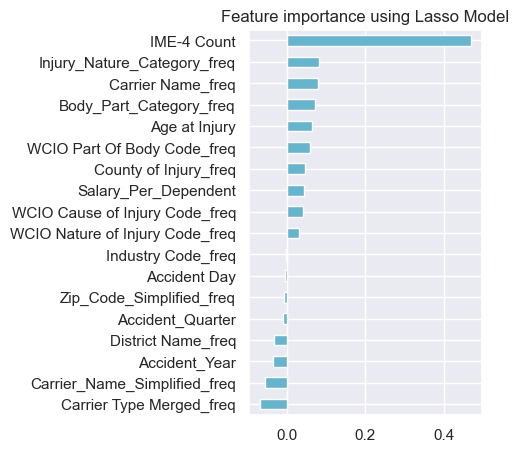

In [17]:
plot_importance(coef,'Lasso')

Let's consider all the values above 0.05.

 ### 4.2.2. Recursive Feature Elimination - RFE <a class="anchor" id="sub_section_4_2_2"></a>

  [Back to 4.2. Numerical Features](#section_4_2)<br>
 

RFE is employed here to further validate the important features as identified by LASSO. By sequentially removing the least important features, RFE helps to refine the feature set.

The selected features after RFE likely overlap with those identified by LASSO, suggesting consistency in feature importance.
Using both LASSO and RFE provides a more robust feature selection by cross-validating the importance of individual features.

This block of code performs RFE to identify the best subset of features by iterating over a range of feature numbers. The code aims to maximize model performance on the validation set.

In [18]:
# RFE using Logistic Regression
model = LogisticRegression()

#Use the function defined in utils.py
best_features, best_score, scores = find_optimal_features_with_rfe(
    model, 
    X_train_num_scaled, 
    y_train_encoded, 
    X_val_num_scaled, 
    y_val_encoded,
    max_features=19
)

Optimum number of features: 18
F1 Macro Score with 18 features: 0.189478



The loop evaluates models with 1 to 18 features, tracking the score for each.

The output indicates that 18 features yielded the highest validation f1_score score of 0.189478.

**Applying RFE with the Optimal Number of Features**

Once the optimal number of features is identified, the RFE model is finalized with this configuration.

In [37]:
#rfscv- to select 1st the number of features we should select
model = LogisticRegression()
rfe = RFE(estimator = model, n_features_to_select = 18)

In [38]:
X_rfe= rfe.fit_transform(X=X_train_num_scaled, y=y_train_encoded)

This shows the results of the feature selection process, listing the features selected by RFE. The code snippet confirms which features were selected as relevant by the RFE model and displays them in a boolean Series, where True indicates the feature was selected and False means it was not.

In [39]:
selected_features = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
selected_features

Age at Injury                      True
IME-4 Count                        True
Accident_Quarter                   True
Accident_Year                      True
Accident Day                       True
Salary_Per_Dependent               True
Carrier_Name_Simplified_freq       True
Zip_Code_Simplified_freq           True
Industry Code_freq                 True
County of Injury_freq              True
District Name_freq                 True
WCIO Cause of Injury Code_freq     True
WCIO Nature of Injury Code_freq    True
WCIO Part Of Body Code_freq        True
Carrier Name_freq                  True
Body_Part_Category_freq            True
Injury_Nature_Category_freq        True
Carrier Type Merged_freq           True
dtype: bool

### 4.2.3. Feature Importance - Decision Tree <a class="anchor" id="sub_section_4_2_3"></a>
 [Back to 4.2. Numerical Features](#section_4_2)<br>



In [22]:
from utils import compare_feature_importances

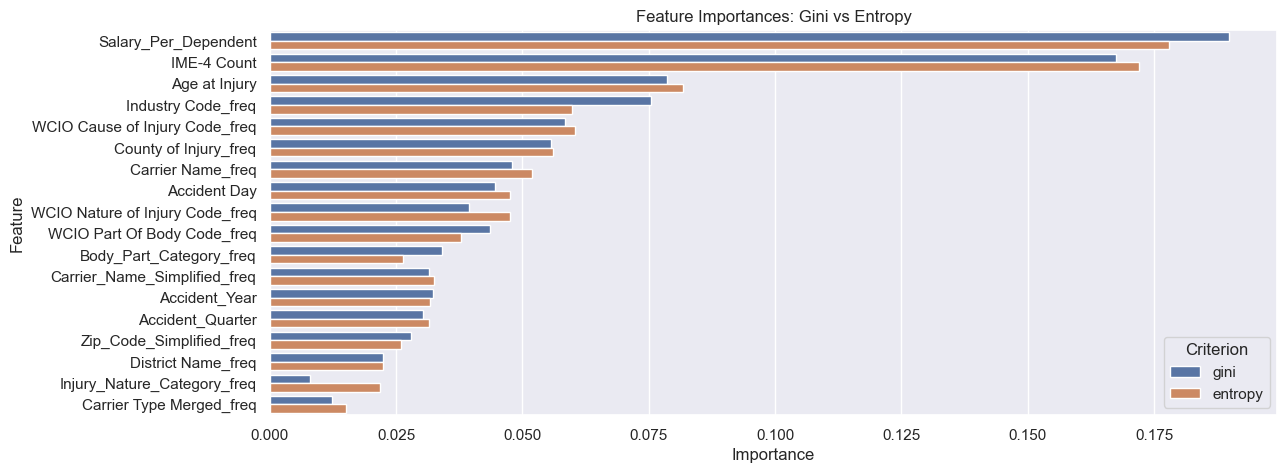

       gini   entropy               col
0  0.078687  0.081737     Age at Injury
1  0.167451  0.172007       IME-4 Count
2  0.030237  0.031603  Accident_Quarter
3  0.032307  0.031674     Accident_Year
4  0.044639  0.047569      Accident Day


In [23]:
# Call the function with your training data
zippy = compare_feature_importances(X_train_num_scaled, y_train_encoded)

# Access the DataFrame for further analysis if needed
print(zippy.head())

### 4.2.4. Feature Importance - Random Forest <a class="anchor" id="sub_section_4_2_4"></a>

 [Back to 4.2. Numerical Features](#section_4_2)<br>


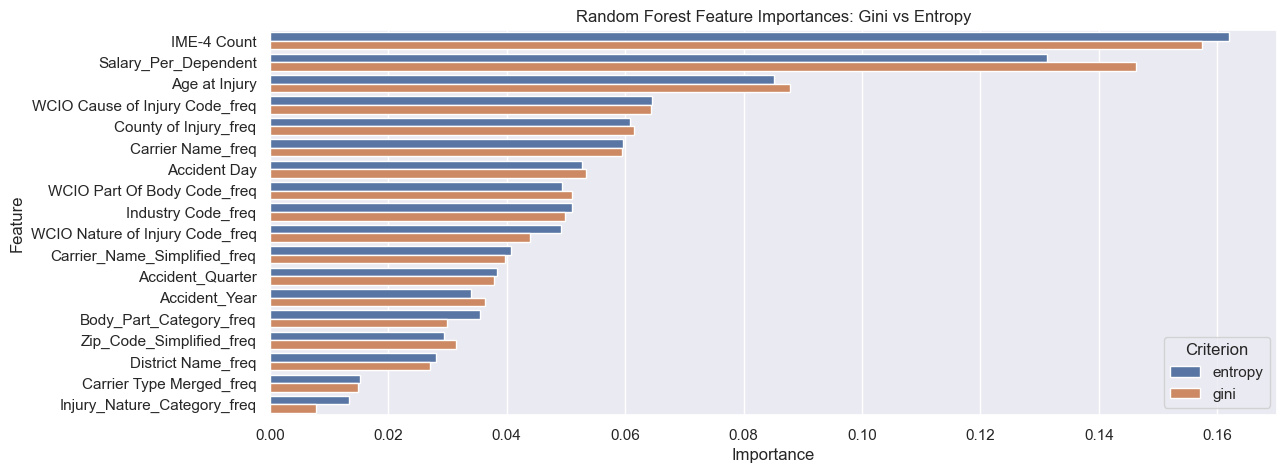

       gini   entropy               col
0  0.087757  0.085109     Age at Injury
1  0.157387  0.162005       IME-4 Count
2  0.037933  0.038286  Accident_Quarter
3  0.036261  0.033961     Accident_Year
4  0.053356  0.052781      Accident Day


In [24]:
# Call the function with your training data
importances = compare_rf_feature_importances(X_train_num_scaled, y_train_encoded)

# Access the DataFrame for further analysis if needed
print(importances.head())

## 4.3. Categorical Features</b> <a class="anchor" id="section_4_3"></a>
[Back to 4. Feature Selection](#chapter4)<br>

Chi-squared and MIC for the categorical ones.

In [25]:
X_train_mic_chi2 = X_train[feature_categories['categorical'] + feature_categories['binary']]

In [26]:
X_train_mic_chi2.shape

(459219, 11)

In [27]:
X_train_mic_chi2.columns

Index(['Income_Category', 'Age Group', 'promptness_category',
       'promptness_C2_category', 'promptness_C3_category', 'Industry Risk',
       'Gender_M', 'Gender_U', 'Medical Fee Region_II',
       'Medical Fee Region_III', 'Medical Fee Region_UK'],
      dtype='object')

 ### 4.3.1. $\chi ^2$ Test for Independence <a class="anchor" id="sub_section_4_3_1"></a>

[Back to 4.3. Categorical Features](#section_4_3)<br>


The Chi-squared test helps us identify the most relevant categorical and binary features by evaluating their independence with the target variable. 

In [28]:
from utils import select_high_score_features_chi2_no_model

In [29]:
# Example usage
high_score_features_chi2, scores = select_high_score_features_chi2_no_model(
    X_train_mic_chi2, 
    y_train_encoded, 
    threshold=6
)

Top 6 features based on Chi-square scores: ['Income_Category', 'promptness_C3_category', 'promptness_category', 'promptness_C2_category', 'Age Group', 'Gender_M']
Corresponding Chi-square scores: [22994.311146633525, 17690.608801763363, 7073.780016219587, 6424.45803850985, 4266.366842167617, 1788.1577009239163]


In [30]:
high_score_features_chi2

['Income_Category',
 'promptness_C3_category',
 'promptness_category',
 'promptness_C2_category',
 'Age Group',
 'Gender_M']

 ### 4.3.2. Mutual Information Criterion (MIC) <a class="anchor" id="sub_section_4_3_2"></a>

 [Back to 4.3. Categorical Features](#section_4_3)<br>
 

The Mutual Information Criterion is used to measure the dependence between each feature and the target variable. By setting a threshold, we retain only the most relevant features.

In [31]:
from utils import select_high_score_features_MIC

In [32]:
# Example usage
high_score_features_MIC, scores_MIC = select_high_score_features_MIC(
    X_train_mic_chi2, 
    y_train_encoded, 
    threshold=6, 
    random_state=42)

Top 6 features based on MIC scores: ['promptness_C3_category', 'Income_Category', 'promptness_C2_category', 'Industry Risk', 'Gender_M', 'promptness_category']
Corresponding MIC scores: [0.13956777543925414, 0.11218480819104304, 0.05872388377400384, 0.033421802381012444, 0.03260363270931377, 0.03209211630864184]


In [33]:
X_train_mic_chi2.shape

(459219, 11)

In [34]:
high_score_features_MIC

['promptness_C3_category',
 'Income_Category',
 'promptness_C2_category',
 'Industry Risk',
 'Gender_M',
 'promptness_category']

**Intersection of Selected Features by Chi-squared and MIC** <br>
To identify the most relevant categorical features, we take the intersection of features selected by both Chi-squared and MIC methods.

In [35]:
# Find common features between Chi-squared and MIC selections
common_categorical_features = list(set(high_score_features_chi2).intersection(set(high_score_features_MIC)))
features_selected = common_categorical_features  # Final list of selected features
features_selected  # Display the list of intersected features

['promptness_C3_category',
 'Income_Category',
 'promptness_category',
 'Gender_M',
 'promptness_C2_category']

## 4.4. Final Features</b> <a class="anchor" id="section_4_4"></a>
[Back to 4. Feature Selection](#chapter4)<br>

The following table evaluates all numerical features using multiple feature selection techniques: Spearman Correlation, LASSO Regression, RFE, Decision Tree, and Random Forest. Based on these combined insights, a final decision is provided in the "What to do?" column.

| **Predictor**                     | **LASSO** | **RFE** | **Decision Tree Importance** | **Random Forest Importance** | **What to do?**                    |
|------------------------------------|-----------|---------|-------------------------------|------------------------------|-------------------------------------|
| **Carrier Type Merged_freq**       | Keep      | Keep | Low                           | Low                          | Consider Include                             |
| **Carrier_Name_Simplified_freq**   | Keep   | Keep | Low                           | Low                          | Consider Include                             |
| **Injury_Nature_Category_freq**    | Keep      | Keep | Low                           | Low                          | Consider Include                             |
| **District Name_freq**             | Discard   | Keep | Low                           | Low                          | Discard                             |
| **Accident_Quarter**               | Discard   | Keep | Low                           | Low                          | Discard                             |
| **Accident_Year**                  | Discard   | Keep | Low                           | Low                          | Discard                             |
| **Zip_Code_Simplified_freq**       | Discard   | Keep | Low                           | Low                          | Discard                             |
| **WCIO Cause of Injury Code_freq** | Discard   | Keep | High                           | High                          | Include                             |
| **Accident Day**                   | Discard   | Keep | Low                           | Low                          | Discard                             |
| **Industry Code_freq**             | Discard      | Keep | High                           | Low                          | Consider Include                             |
| **Body_Part_Category_freq**        | Keep      | Keep    | Low                           | Low                          | Include                             |
| **WCIO Part Of Body Code_freq**    | Discard   | Keep | Low                           | Low                          | Discard                             |
| **WCIO Nature of Injury Code_freq**| Discard   | Keep    | Low                           | Low                          | Discard                             |
| **Carrier Name_freq**              | Keep      | Keep | Low                           | Low                          | Consider Include                             |
| **Salary_Per_Dependent**           | Discard      | Keep | High                          | High                         | Include                             |
| **County of Injury_freq**          | Discard   | Keep | High                           | High                          | Include                             |
| **Age at Injury**                  | Keep      | Keep | High                          | High                         | Include                             |
| **IME-4 Count**                    | Keep      | Keep    | High                          | High                         | Include                             |

### Categorical Feature Selection Results

The following table summarizes the decisions for each categorical feature based on **Mutual Information (MIC)** and **Chi-Squared (X²)** results. The retained features will be used in subsequent modeling to enhance predictive performance.

| **Feature**                | **X² Results** | **MIC Results** | **Decision**                  |
|-----------------------------|----------------|------------------|-------------------------------|
| **promptness_C2_category** | Keep           | Keep             | Include                       |
| **promptness_category**     | Keep           | Keep             | Include                       |
| **promptness_C3_category**  | Keep           | Keep             | Include                       |
| **Age Group**               | Keep           | Keep             | Include                       |
| **Income_Category**         | Keep           | Keep             | Include                       |
| **Industry Risk**           | Keep           | Keep             | Consider include in model     |
| **Gender_M**                | Keep           | -                | Consider include in model     |
| **Gender_U**                | -              | -                | Exclude                       |
| **Medical Fee Region_II**   | -              | -                | Exclude                       |
| **Medical Fee Region_III**  | -              | -                | Exclude                       |
| **Medical Fee Region_UK**   | -              | -                | Exclude                       |

In [42]:
# Updated final features list based on feature selection results
final_features = [
    # Categorical features selected through MIC and chi2
   'promptness_C3_category','Income_Category','promptness_category',
   'Gender_M','promptness_C2_category',
    # Important numerical features
    'WCIO Cause of Injury Code_freq', 'Body_Part_Category_freq', 'County of Injury_freq',
    'Salary_Per_Dependent', 'Age at Injury', 'IME-4 Count'
]

final_features_consider = [
    # Categorical features selected through MIC and chi2
   'promptness_C3_category','Income_Category','promptness_category',
   'Gender_M','promptness_C2_category',
    # Important numerical features
    'Carrier Type Merged_freq', 'Carrier Name_freq','Injury_Nature_Category_freq', 'Industry Code_freq',
    'WCIO Cause of Injury Code_freq', 'Body_Part_Category_freq', 'County of Injury_freq',
    'Salary_Per_Dependent', 'Age at Injury', 'IME-4 Count'
]


# Extracting the final features from the processed datasets
X_train_final = X_train[final_features]
X_val_final = X_val[final_features]
X_test_final = df_test[final_features]

# Extracting the final features to consider from the processed datasets
X_train_final_consider = X_train[final_features_consider]
X_val_final_consider = X_val[final_features_consider]
X_test_final_consider = df_test[final_features_consider]

# Print the shape of the final datasets to confirm consistency
print(f"X_train_final shape: {X_train_final.shape}")
print(f"X_val_final shape: {X_val_final.shape}")
print(f"X_test_final shape: {X_test_final.shape}")

# Print the shape of the final datasets to confirm consistency
print(f"X_train_final shape: {X_train_final_consider.shape}")
print(f"X_val_final shape: {X_val_final_consider.shape}")
print(f"X_test_final shape: {X_test_final_consider.shape}")

X_train_final shape: (459219, 11)
X_val_final shape: (114805, 11)
X_test_final shape: (387975, 11)
X_train_final shape: (459219, 15)
X_val_final shape: (114805, 15)
X_test_final shape: (387975, 15)


# 5. Modelling <a class="anchor" id="chapter5"></a>
[Back to ToC](#toc)<br>

In this section, we establish baseline predictions by training and evaluating four machine learning models on the full dataset. These models aim to predict the target variable without addressing class imbalance directly.

## 5.1. Logistic Regression </b> <a class="anchor" id="section_5_1"></a>

[Back to 5. Modeling ](#chapter5)<br>
Logistic Regression is a simple yet effective model for binary classification tasks. While not tailored for imbalanced datasets, it serves as a baseline to compare more sophisticated methods. while Logistic Regression might not be ideal for imbalanced data, it’s included in the analysis to serve as a benchmark and provide a simple, interpretable comparison point.

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.42      0.03      0.06      9980
           1       0.65      0.97      0.78    232862
           2       0.33      0.00      0.00     55125
           3       0.55      0.50      0.53    118805
           4       0.49      0.06      0.11     38624
           5       0.05      0.00      0.00      3369
           6       0.00      0.00      0.00        78
           7       0.00      0.00      0.00       376

    accuracy                           0.63    459219
   macro avg       0.31      0.20      0.19    459219
weighted avg       0.57      0.63      0.54    459219

_________________________

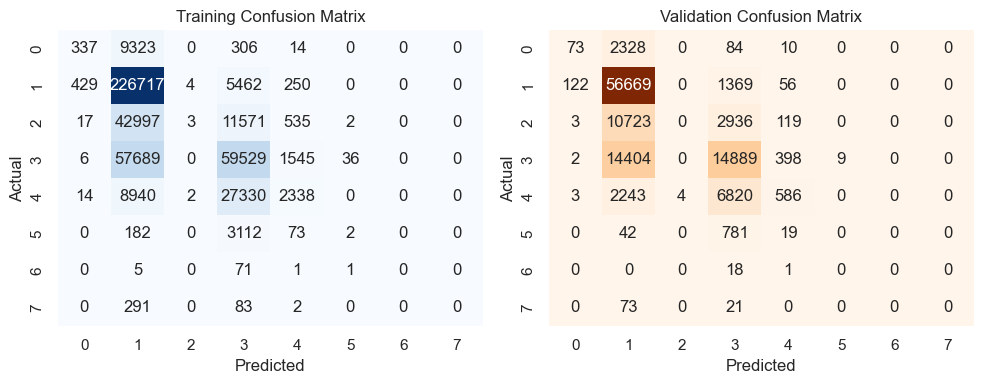

Time taken to run the cell: 26.88 seconds


In [44]:
# Record the start time
start_time = time.time()

# Scale features
scaler_log = StandardScaler()

# Fit on training data and transform
X_train_scaled = scaler_log.fit_transform(X_train_final)

# Transform validation and test data using the same scaler
X_val_scaled = scaler_log.transform(X_val_final)
X_test_scaled = scaler_log.transform(X_test_final)

lr_model = LogisticRegression(random_state=42, max_iter=500)

# Fit the model to the training data
lr_model.fit(X_train_scaled, y_train_encoded)

# Predict on the training and validation data
y_pred_lr_train = lr_model.predict(X_train_scaled)
y_pred_lr_val = lr_model.predict(X_val_scaled)

# Evaluate the model
metrics(y_train_encoded, y_pred_lr_train, y_val_encoded, y_pred_lr_val)

# Record the end time and calculate duration
end_time = time.time()
print(f"Time taken to run the cell: {end_time - start_time:.2f} seconds")

Let's also try with more features using features also to consider.

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.12      0.21      9980
           1       0.67      0.97      0.79    232862
           2       0.22      0.00      0.00     55125
           3       0.57      0.53      0.55    118805
           4       0.56      0.11      0.19     38624
           5       0.06      0.00      0.00      3369
           6       0.00      0.00      0.00        78
           7       0.00      0.00      0.00       376

    accuracy                           0.64    459219
   macro avg       0.35      0.22      0.22    459219
weighted avg       0.58      0.64      0.56    459219

_________________________

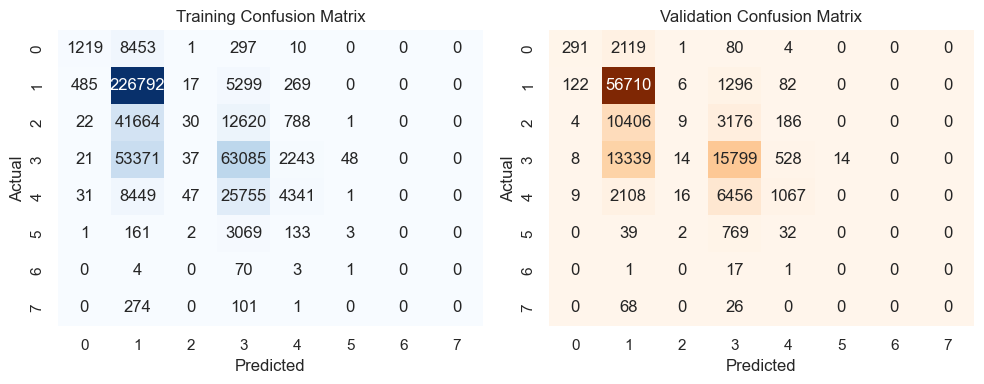

Time taken to run the cell: 69.33 seconds


In [45]:
# Record the start time
start_time = time.time()

# Fit on training data and transform
X_train_scaled_consider = scaler_log.fit_transform(X_train_final_consider)

# Transform validation and test data using the same scaler
X_val_scaled_consider = scaler_log.transform(X_val_final_consider)
X_test_scaled_consider = scaler_log.transform(X_test_final_consider)

lr_model = LogisticRegression(random_state=42, max_iter=500)

# Fit the model to the training data
lr_model.fit(X_train_final_consider, y_train_encoded)

# Predict on the training and validation data
y_pred_lr_train = lr_model.predict(X_train_final_consider)
y_pred_lr_val = lr_model.predict(X_val_final_consider)

# Evaluate the model
metrics(y_train_encoded, y_pred_lr_train, y_val_encoded, y_pred_lr_val)

# Record the end time and calculate duration
end_time = time.time()
print(f"Time taken to run the cell: {end_time - start_time:.2f} seconds")

With more features our model improves 0.03 and doesn't overfit despite the f1_macro score is relativaly low.

## 5.2. Decision Trees</b> <a class="anchor" id="section_5_2"></a>
[Back to 5. Modeling ](#chapter5)<br>


Decision Trees are versatile models that can capture non-linear patterns by splitting data based on feature values.

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.49      0.35      0.41      9980
           1       0.54      0.11      0.18    232862
           2       0.15      0.20      0.17     55125
           3       0.28      0.57      0.38    118805
           4       0.20      0.44      0.28     38624
           5       0.15      0.30      0.20      3369
           6       0.14      0.23      0.17        78
           7       0.11      0.05      0.07       376

    accuracy                           0.27    459219
   macro avg       0.26      0.28      0.23    459219
weighted avg       0.39      0.27      0.24    459219

_________________________

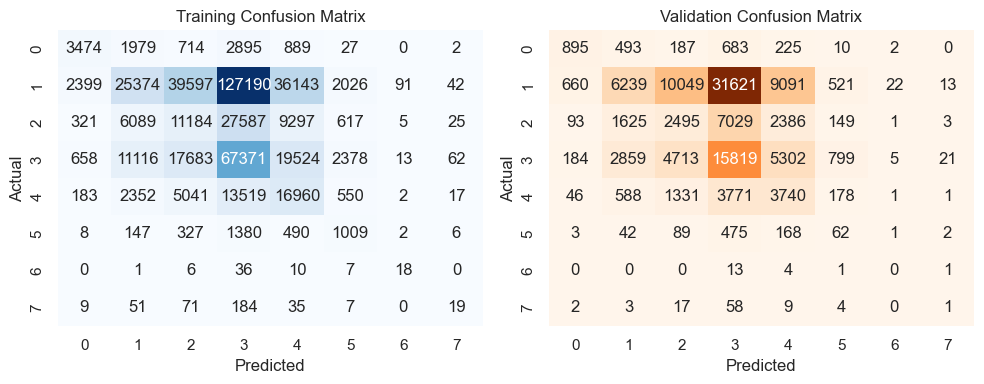

Time taken for Decision Tree: 15.20 seconds


In [46]:
# Decision Tree Classifier
start_time = time.time()

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled_consider, y_train_encoded)

# Predictions
y_pred_dt_train = dt_model.predict(X_train_final_consider)
y_pred_dt_val = dt_model.predict(X_val_final_consider)

# Evaluate the model
metrics(y_train_encoded, y_pred_dt_train, y_val_encoded, y_pred_dt_val)

# Execution Time
end_time = time.time()
print(f"Time taken for Decision Tree: {end_time - start_time:.2f} seconds")

Let's try to implement a Grid Search to check if we can improve our score.

Fitting 2 folds for each of 288 candidates, totalling 576 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.20      0.30      9980
           1       0.62      0.50      0.55    232862
           2       0.17      0.02      0.04     55125
           3       0.37      0.54      0.44    118805
           4       0.21      0.48      0.30     38624
           5       0.53      0.01      0.02      3369
           6       0.00      0.00      0.00        78
           7       0.00      0.00      0.00       37

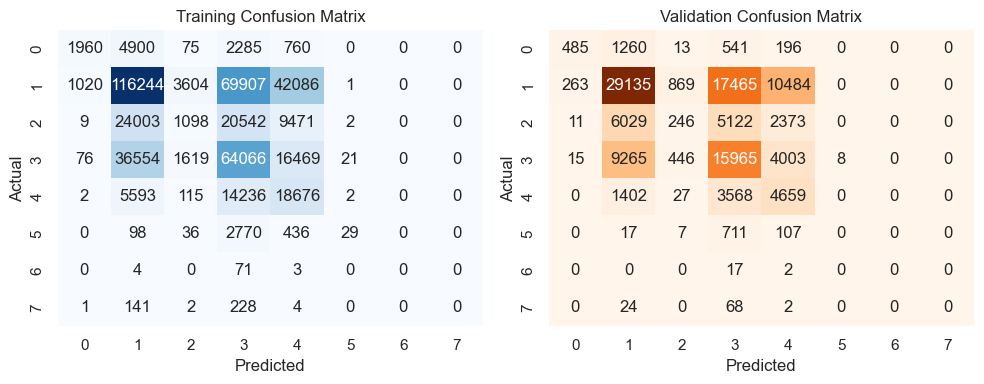

Time taken for Decision Tree: 120.95 seconds


In [65]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Start timing the grid search
start_time = time.time()

# Perform GridSearchCV
grid_search = GridSearchCV(dt_model, param_grid, cv=2, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled_consider, y_train_encoded)

# Best parameters from GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")

# Use the best estimator found by GridSearchCV
best_dt_model = grid_search.best_estimator_

# Predictions with the best model
y_pred_dt_train = best_dt_model.predict(X_train_final_consider)
y_pred_dt_val = best_dt_model.predict(X_val_final_consider)

# Evaluate the model
metrics(y_train_encoded, y_pred_dt_train, y_val_encoded, y_pred_dt_val)

# Execution Time
end_time = time.time()
print(f"Time taken for Decision Tree: {end_time - start_time:.2f} seconds")

## 5.3. Random Forest Trees</b> <a class="anchor" id="section_5_3"></a>
[Back to 5. Modelling ](#chapter5)<br>

Random Forest is an ensemble learning method that combines multiple decision trees trained on random subsets of data and features to improve accuracy and reduce overfitting. It aggregates their predictions using majority voting for classification or averaging for regression.

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9980
           1       1.00      1.00      1.00    232862
           2       1.00      1.00      1.00     55125
           3       1.00      1.00      1.00    118805
           4       1.00      1.00      1.00     38624
           5       1.00      1.00      1.00      3369
           6       1.00      1.00      1.00        78
           7       1.00      1.00      1.00       376

    accuracy                           1.00    459219
   macro avg       1.00      1.00      1.00    459219
weighted avg       1.00      1.00      1.00    459219

_________________________

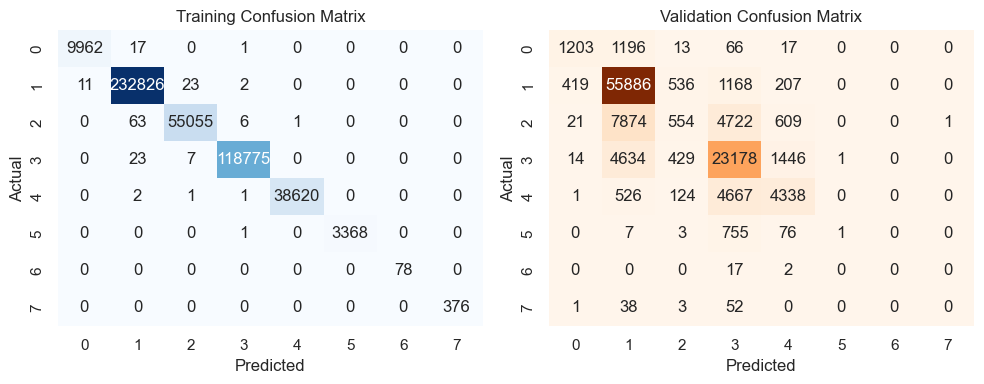

Time taken for Random Forest: 361.75 seconds


In [48]:
# Random Forest Classifier
start_time = time.time()

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_final_consider, y_train_encoded)

# Predictions
y_pred_rf_train = rf_model.predict(X_train_final_consider)
y_pred_rf_val = rf_model.predict(X_val_final_consider)

# Evaluate the model
metrics(y_train_encoded, y_pred_rf_train, y_val_encoded, y_pred_rf_val)

# Execution Time
end_time = time.time()
print(f"Time taken for Random Forest: {end_time - start_time:.2f} seconds")

## 5.4. SVM </b> <a class="anchor" id="section_5_4"></a>
[Back to 5. Modeling ](#chapter5)<br>

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import time

# Scale the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_val_scaled = scaler.transform(X_val_final)

# Start timing
start_time = time.time()

# Initialize the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Fit the model on the scaled training data
svm_model.fit(X_train_scaled, y_train_encoded)

# Make predictions on the scaled training and validation datasets
y_pred_svm_train = svm_model.predict(X_train_scaled)
y_pred_svm_val = svm_model.predict(X_val_scaled)

# Evaluate the model using the `metrics` function
metrics(y_train_encoded, y_pred_svm_train, y_val_encoded, y_pred_svm_val)

# End timing
end_time = time.time()
print(f"Time taken for SVM: {end_time - start_time:.2f} seconds")

## 5.5. Gradient Boosting </b> <a class="anchor" id="section_5_5"></a>
[Back to 5. Modeling ](#chapter5)<br>


Gradient Boosting models (e.g., XGBoost, LightGBM) are powerful ensemble methods that iteratively improve performance by minimizing errors. <br>

#### **XGBClassifier**

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.51      0.61      9980
           1       0.82      0.98      0.89    232862
           2       0.51      0.04      0.07     55125
           3       0.70      0.83      0.76    118805
           4       0.68      0.53      0.60     38624
           5       0.91      0.04      0.07      3369
           6       1.00      0.90      0.95        78
           7       0.93      0.40      0.56       376

    accuracy                           0.77    459219
   macro avg       0.79      0.53      0.56    459219
weighted avg       0.74      0.77      0.72    459219

_________________________

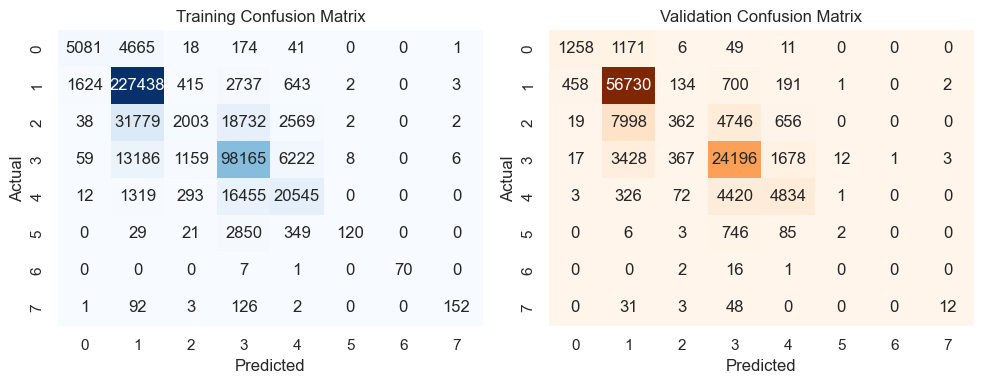

Time taken for XGBoost: 31.44 seconds


In [50]:
import xgboost as xgb

# XGBoost Classifier
start_time = time.time()

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_final_consider, y_train_encoded)

# Predictions
y_pred_xgb_train = xgb_model.predict(X_train_final_consider)
y_pred_xgb_val = xgb_model.predict(X_val_final_consider)

# Evaluate the model
metrics(y_train_encoded, y_pred_xgb_train, y_val_encoded, y_pred_xgb_val)

# Execution Time
end_time = time.time()
print(f"Time taken for XGBoost: {end_time - start_time:.2f} seconds")

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.48      0.56      9980
           1       0.76      0.97      0.85    232862
           2       0.40      0.00      0.00     55125
           3       0.66      0.71      0.68    118805
           4       0.62      0.43      0.51     38624
           5       0.00      0.00      0.00      3369
           6       1.00      0.01      0.03        78
           7       0.67      0.01      0.02       376

    accuracy                           0.72    459219
   macro avg       0.60      0.33      0.33    459219
weighted avg       0.67      0.72      0.66    459219

_________________________

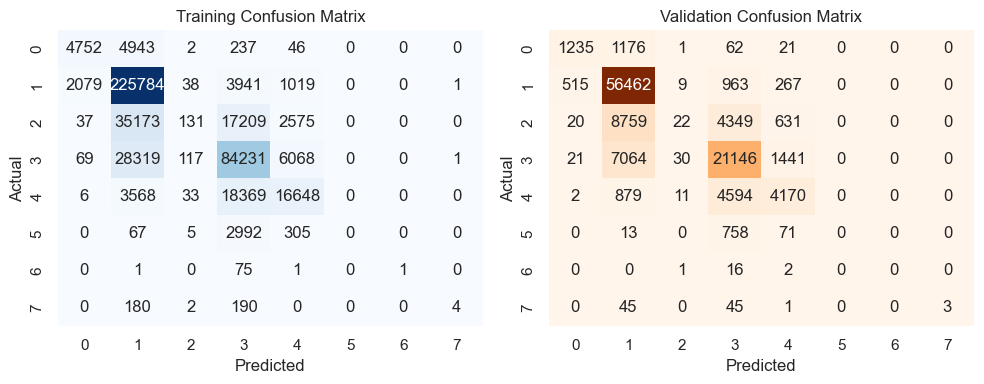

Time taken for XGBoost: 77.48 seconds


In [116]:
import xgboost as xgb

# XGBoost Classifier with anti-overfitting parameters
start_time = time.time()

xgb_model = xgb.XGBClassifier(
    use_label_encoder=False, 
    eval_metric='logloss', 
    random_state=42,
    max_depth=4,  # Limit tree depth to reduce overfitting
    min_child_weight=3,  # Minimum sum of instance weight (hessian) needed in a child
    learning_rate=0.1,  # Learning rate (lower values slow training but reduce overfitting)
    n_estimators=100,  # Limit the number of trees
    subsample=0.8,  # Use 80% of data for each tree
    colsample_bytree=0.8,  # Use 80% of features for each tree
    reg_alpha=0.1,  # L1 regularization term on weights
    reg_lambda=1.0  # L2 regularization term on weights
)

# Fit the model
xgb_model.fit(X_train_final_consider, y_train_encoded)

# Predictions
y_pred_xgb_train = xgb_model.predict(X_train_final_consider)
y_pred_xgb_val = xgb_model.predict(X_val_final_consider)

# Evaluate the model
metrics(y_train_encoded, y_pred_xgb_train, y_val_encoded, y_pred_xgb_val)

# Execution Time
end_time = time.time()
print(f"Time taken for XGBoost: {end_time - start_time:.2f} seconds")

This model presents overfitting despite increasing the f1 macro score.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import time

# Hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Start time for the training process
start_time = time.time()

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(xgb_model, param_grid, cv=2, n_jobs=-1, verbose=2)
grid_search.fit(X_train_final_consider, y_train_encoded)

# Best parameters from GridSearchCV
print(f"Best parameters from GridSearchCV: {grid_search.best_params_}")

# Use the best estimator
best_xgb_model = grid_search.best_estimator_

# Predictions using the best model
y_pred_xgb_train = best_xgb_model.predict(X_train_final_consider)
y_pred_xgb_val = best_xgb_model.predict(X_val_final_consider)

# Evaluate the model
metrics(y_train_encoded, y_pred_xgb_train, y_val_encoded, y_pred_xgb_val)

# Execution time
end_time = time.time()
print(f"Time taken for XGBoost: {end_time - start_time:.2f} seconds")

#### **CatBoost (CatBoostClassifier)** <br>
CatBoost is a gradient boosting framework designed to natively support categorical features. It is efficient, easy to implement, and often performs well on tabular data.

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.48      0.58      9980
           1       0.81      0.98      0.89    232862
           2       0.49      0.03      0.06     55125
           3       0.70      0.83      0.76    118805
           4       0.68      0.52      0.59     38624
           5       0.82      0.00      0.01      3369
           6       1.00      0.23      0.38        78
           7       0.90      0.28      0.43       376

    accuracy                           0.77    459219
   macro avg       0.77      0.42      0.46    459219
weighted avg       0.73      0.77      0.72    459219

_________________________

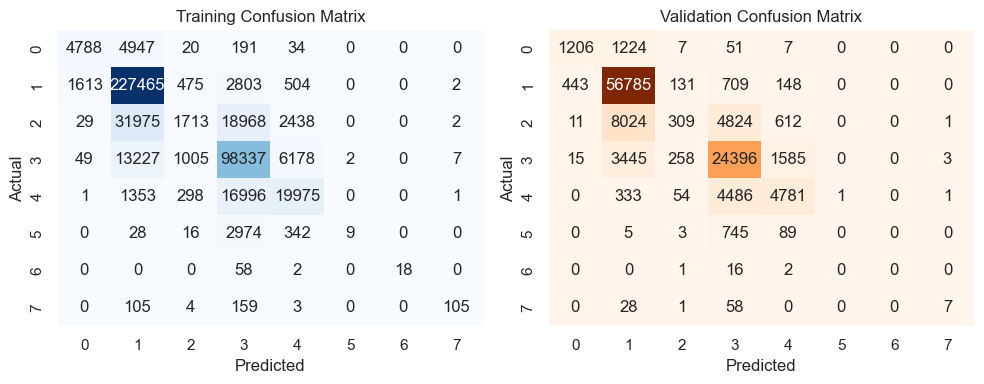

Time taken for CatBoost: 360.67 seconds


In [51]:
from catboost import CatBoostClassifier

# XGBoost Classifier
start_time = time.time()

catboost_model = CatBoostClassifier(random_state=42, verbose=0)  # Set verbose=0 to suppress training logs
catboost_model.fit(X_train_final_consider, y_train_encoded)

# Predictions
y_pred_xgb_train = catboost_model.predict(X_train_final_consider)
y_pred_xgb_val = catboost_model.predict(X_val_final_consider)

# Evaluate the model
metrics(y_train_encoded, y_pred_xgb_train, y_val_encoded, y_pred_xgb_val)

# Execution Time
end_time = time.time()
print(f"Time taken for CatBoost: {end_time - start_time:.2f} seconds")

Let's try to undersampling the majority classes and oversmapling the minority ones.

In [59]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Assuming X_train and y_train are your features and target
print(f"Before SMOTE, class distribution: {Counter(y_train)}")

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to your training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_final_consider, y_train_encoded)

print(f"After SMOTE, class distribution: {Counter(y_train_resampled)}")

Before SMOTE, class distribution: Counter({'2. NON-COMP': 232862, '4. TEMPORARY': 118805, '3. MED ONLY': 55125, '5. PPD SCH LOSS': 38624, '1. CANCELLED': 9980, '6. PPD NSL': 3369, '8. DEATH': 376, '7. PTD': 78})
After SMOTE, class distribution: Counter({3: 232862, 2: 232862, 1: 232862, 4: 232862, 0: 232862, 5: 232862, 7: 232862, 6: 232862})


___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.87      0.89    232862
           1       0.79      0.96      0.87    232862
           2       0.66      0.50      0.57    232862
           3       0.67      0.53      0.59    232862
           4       0.71      0.76      0.74    232862
           5       0.79      0.90      0.84    232862
           6       0.99      1.00      0.99    232862
           7       0.95      1.00      0.97    232862

    accuracy                           0.82   1862896
   macro avg       0.81      0.82      0.81   1862896
weighted avg       0.81      0.82      0.81   1862896

_________________________

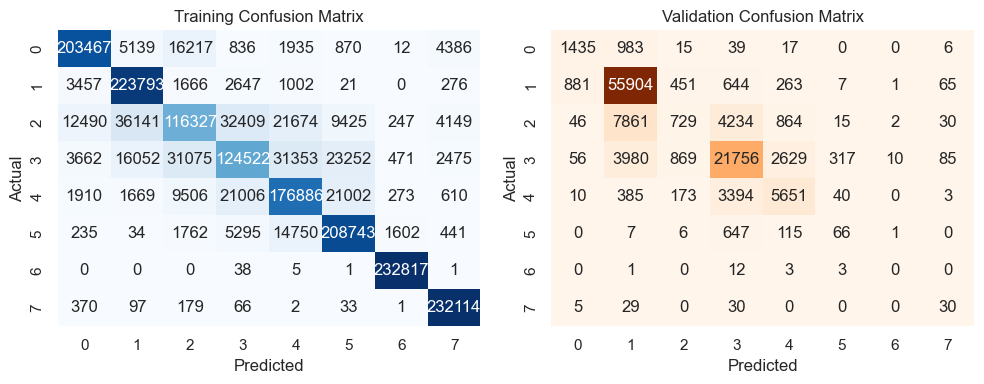

Time taken for CatBoost: 1451.75 seconds


In [60]:
from catboost import CatBoostClassifier

# XGBoost Classifier
start_time = time.time()

catboost_model = CatBoostClassifier(random_state=42, verbose=0)  # Set verbose=0 to suppress training logs
catboost_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_cat_train = catboost_model.predict(X_train_resampled)
y_pred_cat_val = catboost_model.predict(X_val_final_consider)

# Evaluate the model
metrics(y_train_resampled, y_pred_cat_train, y_val_encoded, y_pred_cat_val)

# Execution Time
end_time = time.time()
print(f"Time taken for CatBoost: {end_time - start_time:.2f} seconds")

#### **LightGBM** <br>
LightGBM is a gradient boosting framework designed for fast training and low memory usage. It works well with large datasets and can efficiently handle imbalanced data


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.057903 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 759
[LightGBM] [Info] Number of data points in the train set: 459219, number of used features: 15
[LightGBM] [Info] Start training from score -3.828944
[LightGBM] [Info] Start training from score -0.679081
[LightGBM] [Info] Start training from score -2.119924
[LightGBM] [Info] Start training from score -1.352044
[LightGBM] [Info] Start training from score -2.475653
[LightGBM] [Info] Start training from score -4.914911
[LightGBM] [Info] Start training from score -8.680574
[LightGBM] [Info] Start training from score -7.107693
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
---------------------------------------------------------------

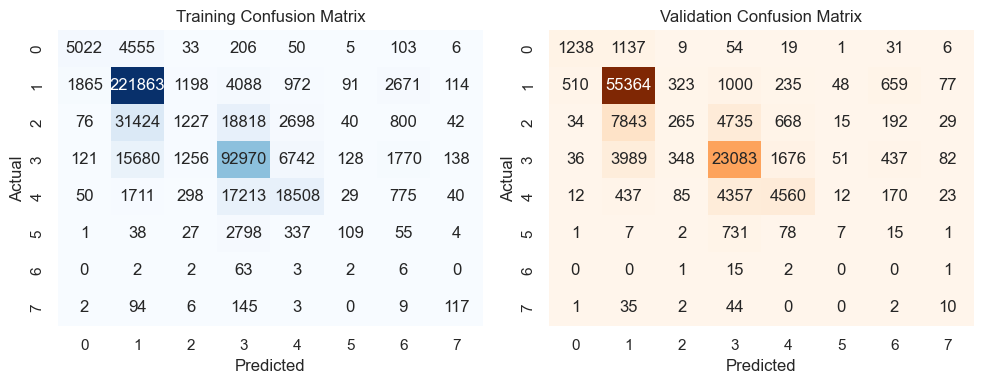

Time taken to run the cell: 30.62 seconds


In [70]:
# Initialize the LightGBM model
from lightgbm import LGBMClassifier
import time

# Record the start time
start_time = time.time()

lgbm_model = LGBMClassifier(random_state=42)

# Fit the model to the training data
lgbm_model.fit(X_train_scaled_consider, y_train_encoded)

# Predict on the training and validation data
y_pred_lgbm_train = lgbm_model.predict(X_train_scaled_consider)
y_pred_lgbm_val = lgbm_model.predict(X_val_scaled_consider)

# Evaluate the model
metrics(y_train_encoded, y_pred_lgbm_train, y_val_encoded, y_pred_lgbm_val)

# Record the end time and calculate duration
end_time = time.time()
print(f"Time taken to run the cell: {end_time - start_time:.2f} seconds")


This isnt predicting every class.

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 759
[LightGBM] [Info] Number of data points in the train set: 459219, number of used features: 15
[LightGBM] [Info] Start training from score -4.461692
[LightGBM] [Info] Start training from score -1.311829
[LightGBM] [Info] Start training from score -0.673230
[LightGBM] [Info] Start training from score -1.984792
[LightGBM] [Info] Start training from score -3.108401
[LightGBM] [Info] Start training from score -4.161365
[LightGBM] [Info] Start training from score -5.912124
[LightGBM] [Info] Start training from score -4.744709
___________________________________________________________________________________________________________
                                                     TRAIN                                                 

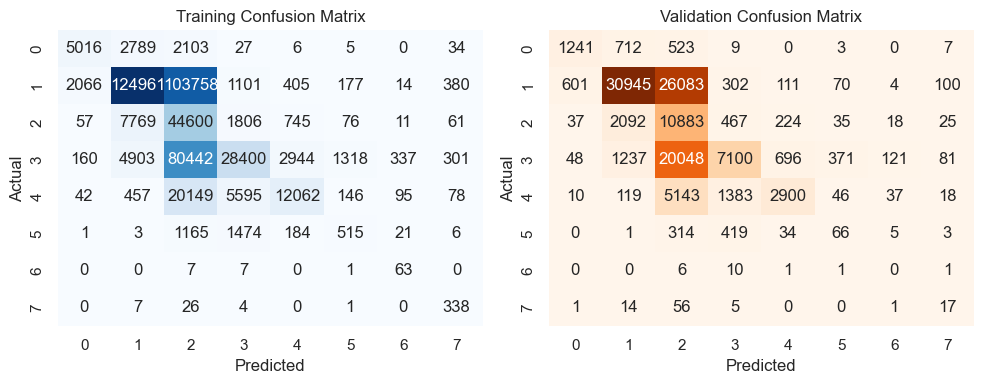

Time taken to run the cell: 33.70 seconds


In [109]:
# Define custom class weights to give more importance to classes 5, 6, and 7
class_weights = {
    0: 1,  # Adjust based on the importance of each class
    1: 1,
    2: 8,
    3: 1,
    4: 1,
    5: 4,  # Increased weight for class 5
    6: 30,  # Increased weight for class 6
    7: 20   # Increased weight for class 7
}

# Record the start time
start_time = time.time()

# Initialize the LightGBM model with class weights
lgbm_model_class = LGBMClassifier(random_state=42, class_weight=class_weights)

# Fit the model to the training data
lgbm_model_class.fit(X_train_scaled_consider, y_train_encoded)

# Predict on the training and validation data
y_pred_lgbm_train = lgbm_model_class.predict(X_train_scaled_consider)
y_pred_lgbm_val = lgbm_model_class.predict(X_val_scaled_consider)

# Evaluate the model
metrics(y_train_encoded, y_pred_lgbm_train, y_val_encoded, y_pred_lgbm_val)

# Record the end time and calculate duration
end_time = time.time()
print(f"Time taken to run the cell: {end_time - start_time:.2f} seconds")


[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 759
[LightGBM] [Info] Number of data points in the train set: 459219, number of used features: 15
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
Best para

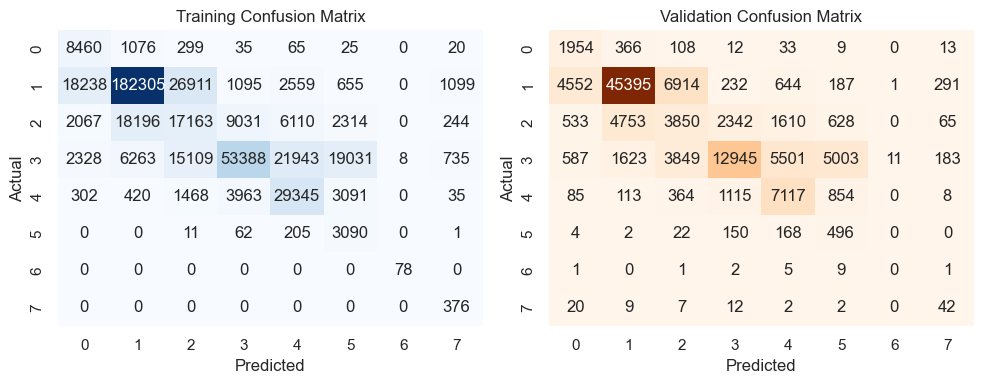

Time taken to run the cell: 6271.85 seconds


In [61]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
import time

# Record the start time
start_time = time.time()

# Define the parameter grid for LightGBM
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [15, 31, 63],
    'max_depth': [3, 5, -1],  # Use -1 for no limit on depth
    'min_child_samples': [20, 50, 100],
    'lambda_l1': [0.0, 0.1, 0.5],
}

# Initialize the LightGBM model
lgbm_model = LGBMClassifier(random_state=42, class_weight='balanced')

# Perform Grid Search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(
    estimator=lgbm_model,
    param_grid=param_grid,
    cv=2,  # 2-fold cross-validation
    scoring='f1_macro',  # Use F1 macro score for imbalanced classes
    n_jobs=-1
)

# Fit the grid search to the training data
grid_search.fit(X_train_scaled_consider, y_train_encoded)

# Get the best model and parameters
best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# Predict on the training and validation data
y_pred_train = best_model.predict(X_train_scaled_consider)
y_pred_val = best_model.predict(X_val_scaled_consider)

# Evaluate the model
metrics(y_train_encoded, y_pred_train, y_val_encoded, y_pred_val)

# Record the end time and calculate duration
end_time = time.time()
print(f"Time taken to run the cell: {end_time - start_time:.2f} seconds")


## 5.6. Voting Classifier </b> <a class="anchor" id="section_5_6"></a>
 [Back to 5. Modeling ](#chapter5)<br>

 A Voting Classifier is an ensemble learning method that combines predictions from multiple different models to make a final decision

In [63]:
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier

# Initialize the models
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
lgbm = LGBMClassifier(random_state=42, class_weight='balanced')
lr = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
catboost = CatBoostClassifier(learning_rate=0.05, depth=6, iterations=1000, random_state=42, verbose=0)
nb = GaussianNB()  # Add Naive Bayes

# Create a VotingClassifier (ensemble)
ensemble = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('lgbm', lgbm),
        ('lr', lr),
        ('catboost', catboost),
        ('nb', nb)  # Add Naive Bayes to the ensemble
    ],
    voting='soft'
)

# Train the individual models
rf.fit(X_train_scaled_consider, y_train_encoded)
lgbm.fit(X_train_scaled_consider, y_train_encoded)
lr.fit(X_train_scaled_consider, y_train_encoded)
catboost.fit(X_train_scaled_consider, y_train_encoded)
nb.fit(X_train_scaled_consider, y_train_encoded)  # Train Naive Bayes

# Train the ensemble model
ensemble.fit(X_train_scaled_consider, y_train_encoded)

# Make predictions on the validation set
rf_train_preds = rf.predict(X_train_scaled_consider)
rf_val_preds = rf.predict(X_val_scaled_consider)

lgbm_train_preds = lgbm.predict(X_train_scaled_consider)
lgbm_val_preds = lgbm.predict(X_val_scaled_consider)

lr_train_preds = lr.predict(X_train_scaled_consider)
lr_val_preds = lr.predict(X_val_scaled_consider)

catboost_train_preds = catboost.predict(X_train_scaled_consider)
catboost_val_preds = catboost.predict(X_val_scaled_consider)

nb_train_preds = nb.predict(X_train_scaled_consider)
nb_val_preds = nb.predict(X_val_scaled_consider)

ensemble_train_preds = ensemble.predict(X_train_scaled_consider)
ensemble_val_preds = ensemble.predict(X_val_scaled_consider)

# Calculate F1 Macro score
rf_f1_train = f1_score(y_train_encoded, rf_train_preds, average='macro')
rf_f1_val = f1_score(y_val_encoded, rf_val_preds, average='macro')

lgbm_f1_train = f1_score(y_train_encoded, lgbm_train_preds, average='macro')
lgbm_f1_val = f1_score(y_val_encoded, lgbm_val_preds, average='macro')

lr_f1_train = f1_score(y_train_encoded, lr_train_preds, average='macro')
lr_f1_val = f1_score(y_val_encoded, lr_val_preds, average='macro')

catboost_f1_train = f1_score(y_train_encoded, catboost_train_preds, average='macro')
catboost_f1_val = f1_score(y_val_encoded, catboost_val_preds, average='macro')

nb_f1_train = f1_score(y_train_encoded, nb_train_preds, average='macro')
nb_f1_val = f1_score(y_val_encoded, nb_val_preds, average='macro')

ensemble_f1_train = f1_score(y_train_encoded, ensemble_train_preds, average='macro')
ensemble_f1_val = f1_score(y_val_encoded, ensemble_val_preds, average='macro')

# Print the F1 Macro scores
print(f"Random Forest F1 Macro - Train: {rf_f1_train:.4f}, Validation: {rf_f1_val:.4f}")
print(f"LightGBM F1 Macro - Train: {lgbm_f1_train:.4f}, Validation: {lgbm_f1_val:.4f}")
print(f"Logistic Regression F1 Macro - Train: {lr_f1_train:.4f}, Validation: {lr_f1_val:.4f}")
print(f"CatBoost F1 Macro - Train: {catboost_f1_train:.4f}, Validation: {catboost_f1_val:.4f}")
print(f"Naive Bayes F1 Macro - Train: {nb_f1_train:.4f}, Validation: {nb_f1_val:.4f}")
print(f"Ensemble F1 Macro - Train: {ensemble_f1_train:.4f}, Validation: {ensemble_f1_val:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 759
[LightGBM] [Info] Number of data points in the train set: 459219, number of used features: 15
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008816 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_w

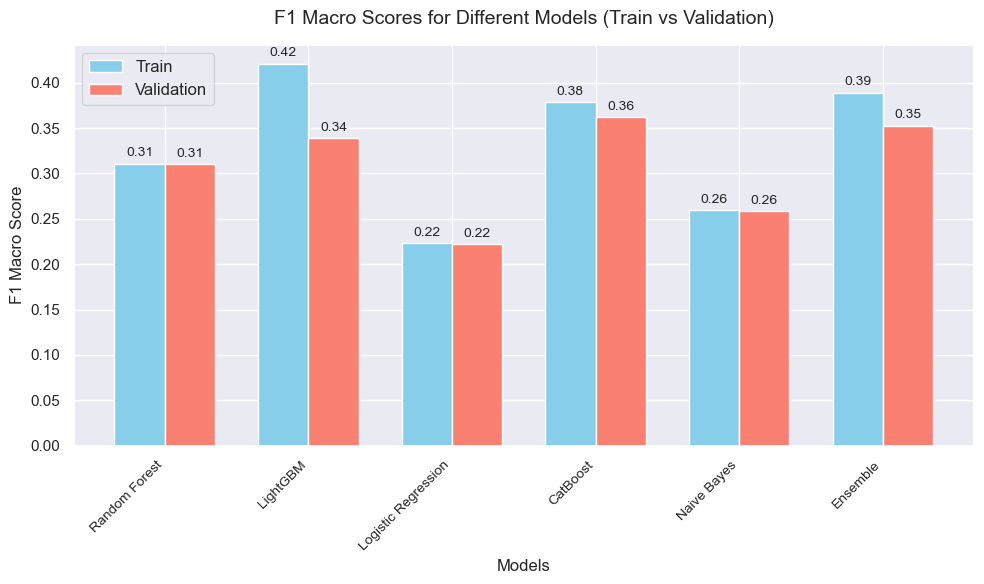

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize the models' F1 scores for train and validation sets
models = ['Random Forest', 'LightGBM', 'Logistic Regression', 'CatBoost','Naive Bayes', 'Ensemble']
train_f1_scores = [rf_f1_train, lgbm_f1_train, lr_f1_train, catboost_f1_train, nb_f1_train, ensemble_f1_train]
val_f1_scores = [rf_f1_val, lgbm_f1_val, lr_f1_val, catboost_f1_val, nb_f1_val, ensemble_f1_val]

# Define bar positions
x = np.arange(len(models))  # Number of models
bar_width = 0.35  # Width of the bars

plt.figure(figsize=(10, 6))

# Plot train F1 scores
bars_train = plt.bar(x - bar_width / 2, train_f1_scores, width=bar_width, label='Train', color='skyblue')

# Plot validation F1 scores
bars_val = plt.bar(x + bar_width / 2, val_f1_scores, width=bar_width, label='Validation', color='salmon')

# Adding labels and title
plt.xlabel('Models', fontsize=12)
plt.ylabel('F1 Macro Score', fontsize=12)
plt.title('F1 Macro Scores for Different Models (Train vs Validation)', fontsize=14, pad=15)
plt.xticks(x, models, rotation=45, ha="right", fontsize=10)
plt.legend(fontsize=12)

# Add F1 scores above each bar
for bar in bars_train:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, 
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)

for bar in bars_val:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, 
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)

# Improve layout and spacing
plt.tight_layout()

# Show the plot
plt.show()

Logistic Regression and Naive Bayes have a really low score. Let's not include these one to check

In [71]:
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier

# Initialize the models
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
lgbm = LGBMClassifier(random_state=42)
catboost = CatBoostClassifier(learning_rate=0.05, depth=6, iterations=1000, random_state=42, verbose=0)

# Create a VotingClassifier (ensemble)
ensemble = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('lgbm', lgbm),
        ('catboost', catboost)
    ],
    voting='soft'
)

# Train the individual models
rf.fit(X_train_scaled_consider, y_train_encoded)
lgbm.fit(X_train_scaled_consider, y_train_encoded)
catboost.fit(X_train_scaled_consider, y_train_encoded)

# Train the ensemble model
ensemble.fit(X_train_scaled_consider, y_train_encoded)

# Make predictions on the validation set
rf_train_preds = rf.predict(X_train_scaled_consider)
rf_val_preds = rf.predict(X_val_scaled_consider)

lgbm_train_preds = lgbm.predict(X_train_scaled_consider)
lgbm_val_preds = lgbm.predict(X_val_scaled_consider)

catboost_train_preds = catboost.predict(X_train_scaled_consider)
catboost_val_preds = catboost.predict(X_val_scaled_consider)

ensemble_train_preds = ensemble.predict(X_train_scaled_consider)
ensemble_val_preds = ensemble.predict(X_val_scaled_consider)

# Calculate F1 Macro score
rf_f1_train = f1_score(y_train_encoded, rf_train_preds, average='macro')
rf_f1_val = f1_score(y_val_encoded, rf_val_preds, average='macro')

lgbm_f1_train = f1_score(y_train_encoded, lgbm_train_preds, average='macro')
lgbm_f1_val = f1_score(y_val_encoded, lgbm_val_preds, average='macro')

catboost_f1_train = f1_score(y_train_encoded, catboost_train_preds, average='macro')
catboost_f1_val = f1_score(y_val_encoded, catboost_val_preds, average='macro')

ensemble_f1_train = f1_score(y_train_encoded, ensemble_train_preds, average='macro')
ensemble_f1_val = f1_score(y_val_encoded, ensemble_val_preds, average='macro')

# Print the F1 Macro scores
print(f"Random Forest F1 Macro - Train: {rf_f1_train:.4f}, Validation: {rf_f1_val:.4f}")
print(f"LightGBM F1 Macro - Train: {lgbm_f1_train:.4f}, Validation: {lgbm_f1_val:.4f}")
print(f"CatBoost F1 Macro - Train: {catboost_f1_train:.4f}, Validation: {catboost_f1_val:.4f}")
print(f"Ensemble F1 Macro - Train: {ensemble_f1_train:.4f}, Validation: {ensemble_f1_val:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 759
[LightGBM] [Info] Number of data points in the train set: 459219, number of used features: 15
[LightGBM] [Info] Start training from score -3.828944
[LightGBM] [Info] Start training from score -0.679081
[LightGBM] [Info] Start training from score -2.119924
[LightGBM] [Info] Start training from score -1.352044
[LightGBM] [Info] Start training from score -2.475653
[LightGBM] [Info] Start training from score -4.914911
[LightGBM] [Info] Start training from score -8.680574
[LightGBM] [Info] Start training from score -7.107693
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_w

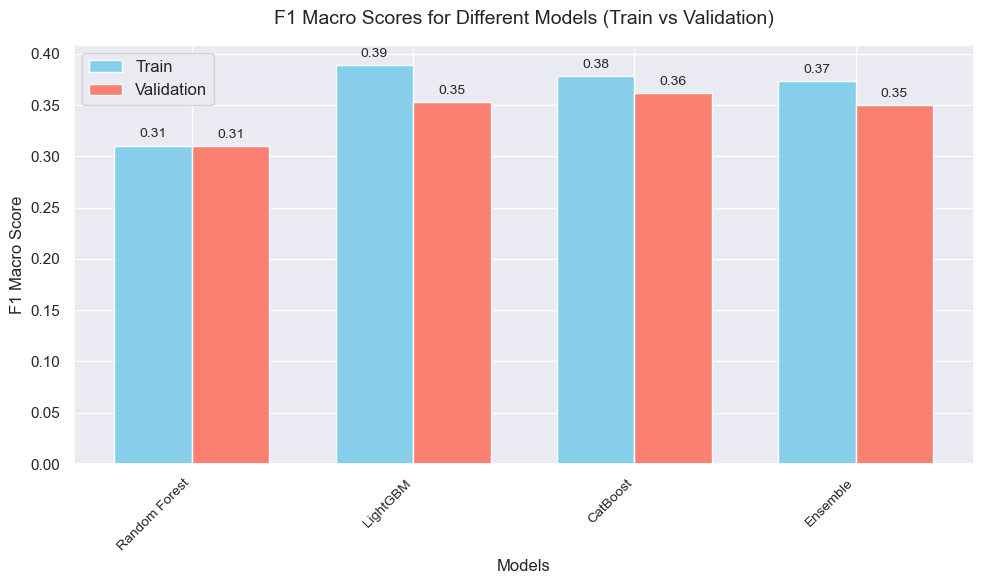

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Updated models' F1 scores for train and validation sets
models = ['Random Forest', 'LightGBM', 'CatBoost', 'Ensemble']
train_f1_scores = [rf_f1_train, lgbm_f1_train, catboost_f1_train, ensemble_f1_train]
val_f1_scores = [rf_f1_val, lgbm_f1_val, catboost_f1_val, ensemble_f1_val]

# Define bar positions
x = np.arange(len(models))  # Number of models
bar_width = 0.35  # Width of the bars

plt.figure(figsize=(10, 6))

# Plot train F1 scores
bars_train = plt.bar(x - bar_width / 2, train_f1_scores, width=bar_width, label='Train', color='skyblue')

# Plot validation F1 scores
bars_val = plt.bar(x + bar_width / 2, val_f1_scores, width=bar_width, label='Validation', color='salmon')

# Adding labels and title
plt.xlabel('Models', fontsize=12)
plt.ylabel('F1 Macro Score', fontsize=12)
plt.title('F1 Macro Scores for Different Models (Train vs Validation)', fontsize=14, pad=15)
plt.xticks(x, models, rotation=45, ha="right", fontsize=10)
plt.legend(fontsize=12)

# Add F1 scores above each bar
for bar in bars_train:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, 
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)

for bar in bars_val:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, 
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)

# Improve layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


Let's also try to add XGBoost.

In [75]:
# Initialize the models
lgbm = LGBMClassifier(random_state=42)
catboost = CatBoostClassifier(learning_rate=0.05, depth=6, iterations=1000, random_state=42, verbose=0)
xgb = XGBClassifier(max_depth=6,learning_rate=0.05,n_estimators=100,subsample=0.8, random_state=42, use_label_encoder=False,eval_metric="mlogloss")

# Create a VotingClassifier (ensemble)
ensemble = VotingClassifier(
    estimators=[
        ('lgbm', lgbm),
        ('catboost', catboost),
        ('xgb', xgb)
    ],
    voting='soft'
)

# Train the individual models
lgbm.fit(X_train_scaled_consider, y_train_encoded)
catboost.fit(X_train_scaled_consider, y_train_encoded)
xgb.fit(X_train_scaled_consider, y_train_encoded)

# Train the ensemble model
ensemble.fit(X_train_scaled_consider, y_train_encoded)

# Make predictions on the validation set
lgbm_train_preds = lgbm.predict(X_train_scaled_consider)
lgbm_val_preds = lgbm.predict(X_val_scaled_consider)

catboost_train_preds = catboost.predict(X_train_scaled_consider)
catboost_val_preds = catboost.predict(X_val_scaled_consider)

xgb_train_preds = xgb.predict(X_train_scaled_consider)
xgb_val_preds = xgb.predict(X_val_scaled_consider)

ensemble_train_preds = ensemble.predict(X_train_scaled_consider)
ensemble_val_preds = ensemble.predict(X_val_scaled_consider)

# Calculate F1 Macro score
lgbm_f1_train = f1_score(y_train_encoded, lgbm_train_preds, average='macro')
lgbm_f1_val = f1_score(y_val_encoded, lgbm_val_preds, average='macro')

catboost_f1_train = f1_score(y_train_encoded, catboost_train_preds, average='macro')
catboost_f1_val = f1_score(y_val_encoded, catboost_val_preds, average='macro')

xgb_f1_train = f1_score(y_train_encoded, xgb_train_preds, average='macro')
xgb_f1_val = f1_score(y_val_encoded, xgb_val_preds, average='macro')

ensemble_f1_train = f1_score(y_train_encoded, ensemble_train_preds, average='macro')
ensemble_f1_val = f1_score(y_val_encoded, ensemble_val_preds, average='macro')

# Print the F1 Macro scores
print(f"Random Forest F1 Macro - Train: {rf_f1_train:.4f}, Validation: {rf_f1_val:.4f}")
print(f"LightGBM F1 Macro - Train: {lgbm_f1_train:.4f}, Validation: {lgbm_f1_val:.4f}")
print(f"CatBoost F1 Macro - Train: {catboost_f1_train:.4f}, Validation: {catboost_f1_val:.4f}")
print(f"XGBoost F1 Macro - Train: {xgb_f1_train:.4f}, Validation: {xgb_f1_val:.4f}")
print(f"Ensemble F1 Macro - Train: {ensemble_f1_train:.4f}, Validation: {ensemble_f1_val:.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 759
[LightGBM] [Info] Number of data points in the train set: 459219, number of used features: 15
[LightGBM] [Info] Start training from score -3.828944
[LightGBM] [Info] Start training from score -0.679081
[LightGBM] [Info] Start training from score -2.119924
[LightGBM] [Info] Start training from score -1.352044
[LightGBM] [Info] Start training from score -2.475653
[LightGBM] [Info] Start training from score -4.914911
[LightGBM] [Info] Start training from score -8.680574
[LightGBM] [Info] Start training from score -7.107693
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062977 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 759
[LightGBM] [Info] Number of data points in the train set: 459219, number of used fea

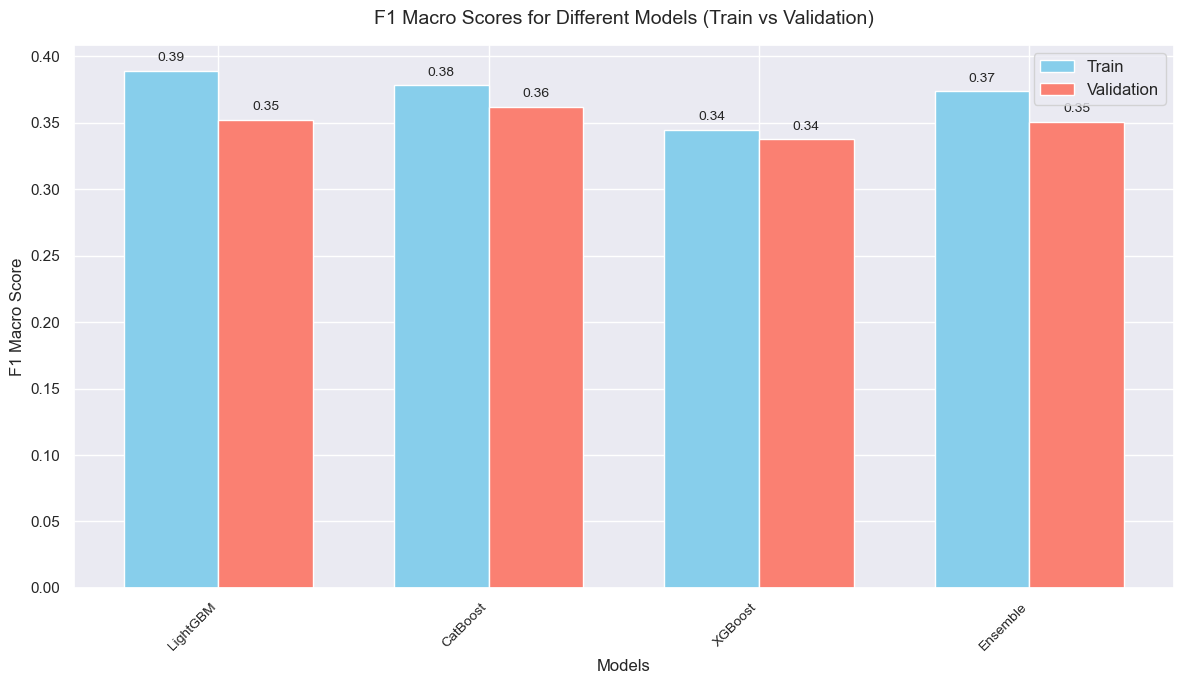

In [76]:
# Updated models' F1 scores for train and validation sets
models = ['LightGBM', 'CatBoost', 'XGBoost', 'Ensemble']
train_f1_scores = [lgbm_f1_train, catboost_f1_train, xgb_f1_train, ensemble_f1_train]
val_f1_scores = [lgbm_f1_val, catboost_f1_val, xgb_f1_val, ensemble_f1_val]

# Define bar positions
x = np.arange(len(models))  # Number of models
bar_width = 0.35  # Width of the bars

plt.figure(figsize=(12, 7))

# Plot train F1 scores
bars_train = plt.bar(x - bar_width / 2, train_f1_scores, width=bar_width, label='Train', color='skyblue')

# Plot validation F1 scores
bars_val = plt.bar(x + bar_width / 2, val_f1_scores, width=bar_width, label='Validation', color='salmon')

# Adding labels and title
plt.xlabel('Models', fontsize=12)
plt.ylabel('F1 Macro Score', fontsize=12)
plt.title('F1 Macro Scores for Different Models (Train vs Validation)', fontsize=14, pad=15)
plt.xticks(x, models, rotation=45, ha="right", fontsize=10)
plt.legend(fontsize=12)

# Add F1 scores above each bar
for bar in bars_train:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, 
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)

for bar in bars_val:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, 
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)

# Improve layout and spacing
plt.tight_layout()

# Show the plot
plt.show()

While the models in this section provide insight into their general performance, their direct application to the full dataset does not address class imbalance effectively. To tackle this issue, we propose a hierarchical classification strategy in the Open-Ended Section. This staged approach aims to improve predictions by dividing the classification problem into smaller, more balanced tasks, potentially outperforming these baseline models.

# 6. Loading the Results <a class="anchor" id="chapter6"></a>

In [131]:
# Make predictions on the test set
test_preds = lgbm.predict(X_test_scaled_consider)  # Predicting 0 or 1 on the scaled test set

# Add predictions to the original df_test (unscaled) using its index
df_test_with_predictions = df_test.copy()
df_test_with_predictions['Claim Injury Type'] = test_preds

In [132]:
df_test_with_predictions['Claim Injury Type'].value_counts()

3    353777
4     24006
5      4910
1      3214
2      2068
Name: Claim Injury Type, dtype: int64

In [133]:
# Define a mapping for injury types with formatted labels
injury_type_mapping = {
    0: "1. CANCELLED",
    1: "2. NON-COMP",
    2: "3. MED ONLY",
    3: "4. TEMPORARY",
    4: "5. PPD SCH LOSS",
    5: "6. PPD NSL",
    6: "7. PTD",
    7: "8. DEATH"
}

# Apply the mapping to the 'Claim Injury Type' column in df_test_with_predictions
df_test_with_predictions['Claim Injury Type'] = df_test_with_predictions['Claim Injury Type'].map(injury_type_mapping)

# Check the first few rows to ensure the mapping was applied correctly
df_test_with_predictions['Claim Injury Type'].value_counts()

4. TEMPORARY       353777
5. PPD SCH LOSS     24006
6. PPD NSL           4910
2. NON-COMP          3214
3. MED ONLY          2068
Name: Claim Injury Type, dtype: int64

In [134]:
# Add the index as a column
df_test_with_predictions.reset_index(inplace=True)

# Keep only the required columns: 'index' and 'Claim Injury Type'
df_final_submission = df_test_with_predictions[['Claim Identifier', 'Claim Injury Type']]

# Save to CSV
df_final_submission.to_csv('flat_submission.csv', index=False)